In [1]:
import rasterio
import rasterio.features
import fiona
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.mask import mask
from affine import Affine
from shapely.geometry import shape
from shapely.geometry import Polygon
%matplotlib inline

In [2]:
src = rasterio.open('/home/cparr/surfaces/depth_ddems/clpx/clpx_2017_dDEM_036m_offset.tif')
dem_src = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/clpx_june5_2017_DEM.tif')
#show(src)

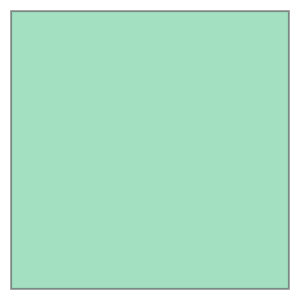

In [3]:
poly = Polygon([(404000,7610000+2500),(404000,7611023+2500),(405023,7611023+2500),(405023,7610000+2500)])
poly

In [41]:
# create a shapely geometry
# this is done for the convenience for the .bounds property only
raster = dem_src
geometry = poly

# get pixel coordinates of the geometry's bounding box
ul = raster.index(*geometry.bounds[0:2])
lr = raster.index(*geometry.bounds[2:4])

# read the subset of the data into a numpy array
window = ((lr[0], ul[0]+1), (ul[1], lr[1]+1))
data = raster.read(1, window=window)

# create an affine transform for the subset data
t = raster.affine
shifted_affine = Affine(t.a, t.b, t.c+ul[1]*t.a, t.d, t.e, t.f+lr[0]*t.e)

# rasterize the geometry
mask = rasterio.features.rasterize(
    [(geometry, 0)],
    out_shape=data.shape,
    transform=shifted_affine,
    fill=1,
    all_touched=True,
    dtype=np.uint8)

# create a masked numpy array
masked_data = np.ma.array(data=data, mask=mask.astype(bool))

/home/cparr/miniconda3/envs/raster_IO_pd/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DeprecationWarning: 'src.affine' is deprecated.  Please switch to 'src.transform'. See https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


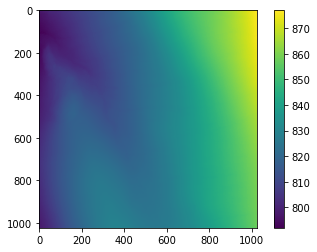

In [42]:
plt.imshow(masked_data)
plt.colorbar()

In [43]:
print(data.shape)
print(shifted_affine)
print(masked_data.dtype)

(1024, 1024)
| 1.00, 0.00, 404000.00|
| 0.00,-1.00, 7613523.00|
| 0.00, 0.00, 1.00|
float32


In [44]:
out_meta = dem_src.meta.copy()

out_meta.update({"driver": "GTiff",
                 "height": data.shape[0],
                 "width": data.shape[1],
                 "transform": shifted_affine})
out_meta

{'count': 1,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 1024,
 'nodata': nan,
 'transform': Affine(1.0, 0.0, 404000.0,
       0.0, -1.0, 7613523.0),
 'width': 1024}

In [45]:
# Write the cropped version out to a new raster
with rasterio.open("/home/cparr/workspace/pattern_similarity/test_images/clpx_dem_1024.tif", "w", **out_meta) as dest:
    dest.write(masked_data, 1)

In [4]:
# create a shapely geometry
# this is done for the convenience for the .bounds property only
raster = src
geometry = poly

# get pixel coordinates of the geometry's bounding box
ul = raster.index(*geometry.bounds[0:2])
lr = raster.index(*geometry.bounds[2:4])

# read the subset of the data into a numpy array
window = ((lr[0], ul[0]+1), (ul[1], lr[1]+1))
data = raster.read(1, window=window)

# create an affine transform for the subset data
t = raster.affine
shifted_affine = Affine(t.a, t.b, t.c+ul[1]*t.a, t.d, t.e, t.f+lr[0]*t.e)

# rasterize the geometry
mask = rasterio.features.rasterize(
    [(geometry, 0)],
    out_shape=data.shape,
    transform=shifted_affine,
    fill=1,
    all_touched=True,
    dtype=np.uint8)

# create a masked numpy array
masked_data = np.ma.array(data=data, mask=mask.astype(bool))

/home/cparr/miniconda3/envs/raster_IO_pd/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DeprecationWarning: 'src.affine' is deprecated.  Please switch to 'src.transform'. See https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


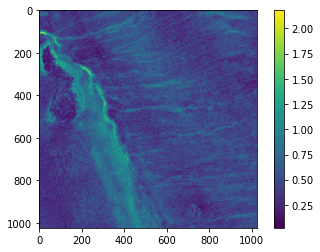

In [5]:
plt.imshow(masked_data)
plt.colorbar()

In [6]:
print(data.shape)
print(shifted_affine)
print(masked_data.dtype)

(1024, 1024)
| 1.00, 0.00, 404000.00|
| 0.00,-1.00, 7613523.00|
| 0.00, 0.00, 1.00|
float32


In [7]:
out_meta = src.meta.copy()

out_meta.update({"driver": "GTiff",
                 "height": data.shape[0],
                 "width": data.shape[1],
                 "transform": shifted_affine})
out_meta

{'count': 1,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 1024,
 'nodata': nan,
 'transform': Affine(1.0, 0.0, 404000.0,
       0.0, -1.0, 7613523.0),
 'width': 1024}

In [8]:
# Write the cropped version out to a new raster
with rasterio.open("/home/cparr/workspace/pattern_similarity/test_images/clpx_depth_1024.tif", "w", **out_meta) as dest:
    dest.write(masked_data, 1)